# Project: Investigate TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Data Set - **TMDb movie data**
> Filename - **tmdb-movies.csv**


**info**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.<br><br>
•	Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.<br>
•	There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.<br>
•	The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
<br><br>
**Column Headers** :<br> id,	imdb_id,	popularity,	budget,	revenue,	original_title,	cast,	homepage,	director,	tagline,	keywords,	overview,	runtime,	genres,	production_companies,	release_date,	vote_count,	vote_average,	release_year,	budget_adj,	revenue_adj.

### Questions to be explored :

##### Question 1: Which movies made the highest % Gross profit from year to year?

##### Question 2: Which genres are most popular from year to year? 

##### Question 3: Compare the mean runtimes per genre?

##### Question 4: What kinds of properties are associated with movies that have high revenues?



In [34]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

**info**: This section will do the following -<br>
* Load in the data<br>
* Clean & Trim the dataset for analysis is **not required** since that has been **already done**.<br> 

### General Properties

In [35]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_movies_df= pd.read_csv('tmdb-movies.csv')

### Data Cleaning (Replace this with more specific notes!)

###### As part of Data cleansing we assume that each movie had a Budget to atleast 1 Dollar and revenue of atleast 1 Dollar.
> This is basically done so that the **highest gross % Profit** does **not** get an **infinite value**.

In [36]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Assuming Budget and Revenue as 1 instead of 0 , so that while calculating Profit % we donot get infinity as answer.
tmdb_movies_df.loc[tmdb_movies_df['budget']==0, 'budget'] = 1
tmdb_movies_df.loc[tmdb_movies_df['revenue']==0, 'revenue'] = 1

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that we trimmed and cleaned your data, we ready to move on to exploration.We will Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. We will Look at one variable at a time, and then follow it up by looking at relationships between variables.



### Question 1: Which movies made the highest % Gross profit from year to year?

> **In order to explore the question we Use Vectorized Operations to calculate the gross proportion profits.** 

In [37]:
tmdb_movies_gross_profit_proportion=(tmdb_movies_df['revenue']-tmdb_movies_df['budget'])/tmdb_movies_df['budget']

Then we create another column named 'gross_profit' in the DataFrame for later on use.


In [38]:
tmdb_movies_df['gross_profit']=tmdb_movies_gross_profit_proportion

We then group the gross profts by years so that we can determine<br> what is the maximum profit in a year and which movies achieved it

In [39]:
tmdb_movies_grouped_by_year=tmdb_movies_df.groupby('release_year')

We will use get_movie_name function to get movie name by index positions later on 

In [40]:
# for an index i we need correspoding movie name so we need to column at index 5 viz for movie name
def get_movie(x):
    i=x.idxmax()
    return  tmdb_movies_df.iloc[i, 5]    

In the movies grouped by year we will use apply function to get movie name by index positions for each element present in the series , output is two series with movie names and other with maximum gross % profit by year

In [41]:
movies_sr_by_year=tmdb_movies_grouped_by_year['gross_profit'].apply(get_movie)
profit_sr_by_year=tmdb_movies_grouped_by_year['gross_profit'].max() 

Then we combine the two series to make one Dataframe

In [42]:
df_profit_title=pd.concat([movies_sr_by_year, profit_sr_by_year], axis=1)
df_profit_title.columns = ['original_title', 'gross_profit_proportion']

Create a plot of the Dataframe

In [43]:
df_profit_title

,original_title,gross_profit_proportion
release_year,,
1960,The Bellboy,9.999999e+06
1961,One Hundred and One Dalmatians,5.297000e+01
1962,The Music Man,7.999999e+06
1963,The Pink Panther,1.087811e+07
1964,A Shot in the Dark,1.236823e+07
1965,The Sound of Music,1.890418e+01
1966,Who's Afraid of Virginia Woolf?,3.498225e+00
1967,The War Wagon,5.999999e+06
1968,Romeo and Juliet,3.890122e+07


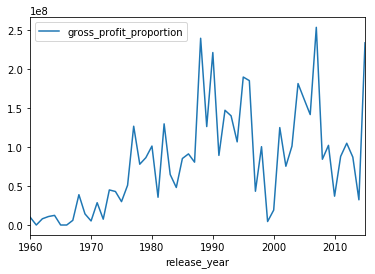

In [44]:
df_profit_title.plot()

##### From above discussion we can figure that 'Wild Hog'  made highest gross profit % in the year 2007 , which is clear from the DataFrame plot and visualisation.

<br><br><br>

### Question 2: Which genres are most popular from year to year?

> Since we need to find the genres which are most popular in each year we will eventually again group the elements by year then find the genres with maximum popularity.

However since we have already grouoed the elements by year we will use the same.

We will use get_genre function to get genre names by index positions later on

In [45]:
# for an index i we need correspoding genre names so we need to column at index 13 viz for genre names
def get_genre(x):
    i=x.idxmax()
    return  tmdb_movies_df.iloc[i, 13]    

In the movies grouped by year we will use apply function to get movie popularity by index positions for each element present in the series , output is two series with genre names and other with maximum popularity by year

In [46]:
popularity_sr_by_year=tmdb_movies_grouped_by_year['popularity'].max()
genre_sr_by_year=tmdb_movies_grouped_by_year['popularity'].apply(get_genre)

Then we combine the two series to make one Dataframe

In [47]:
df_pop_genre=pd.concat([popularity_sr_by_year, genre_sr_by_year], axis=1)
df_pop_genre.columns = ['popularity', 'genres']

Create a plot of the Dataframe

In [48]:
df_pop_genre

,popularity,genres
release_year,,
1960,2.610362,Drama|Horror|Thriller
1961,2.631987,Adventure|Animation|Comedy|Family
1962,3.170651,Adventure|Action|Thriller
1963,2.508235,Action|Thriller|Adventure
1964,3.153791,Adventure|Action|Thriller
1965,1.910465,Adventure|Action|Thriller
1966,1.227582,Animation|Family|Comedy
1967,2.550704,Family|Animation|Adventure
1968,3.309196,Science Fiction|Mystery|Adventure


Create a Visualization of the Dataframe

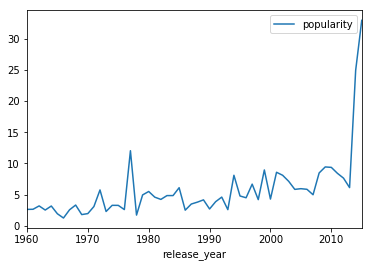

In [49]:
df_pop_genre.plot()

##### From above discussion we can figure that most popular genres are - Action , Adventure ,Science Fiction ,Thriller  in year 2015 , which is clear from the DataFrame plot and visualisation

<br><br><br>

### Question 3: Compare the mean runtimes per genre?

In this question since we need to compare the mean runtimes of each genre type , we will proceed as follows -
> 1) Create a set of all the genres avaiable to us.<br>
> 2) Then for each genre available in the set we will get mean runtimes.

In [80]:
genre_set=set()
def genre_adder(x):
    genre_tuple=tuple(str(x).split('|'))
    for value in genre_tuple:
        if value !='nan':
            genre_set.add(value)

The following code gives us the mean runtime for a Specific genre

In [81]:
tmdb_movies_df['genres'].apply(genre_adder)
mygenre=''
def check_n_split(x):
    return mygenre in str(x).split('|')
def runtime_means_by_genre(genre):
    global mygenre
    mygenre= genre
    kl=tmdb_movies_df['genres'].apply(check_n_split)
    runtimes_selected_genre=tmdb_movies_df[kl.values]['runtime']
    return (runtimes_selected_genre.mean() , len(runtimes_selected_genre))

Using the above code we create a list of mean runtimes all the genres available in the genre set.

In [82]:
list_of_means=[]
for genre in genre_set:
    list_of_means.append(runtime_means_by_genre(genre)[0])

In [83]:
genre_means_sr=pd.Series(list_of_means,index=list(genre_set))

Convert a list to dictionary of mean runtimes all the genres available in the genre set.

In [84]:
genre_means_dict= dict(genre_means_sr)

Create a plot of the Dataframe

In [85]:
genre_means_dict

{'Action': 104.91236897274634,
 'Adventure': 106.17335146159076,
 'Animation': 68.181688125894141,
 'Comedy': 96.745056683364098,
 'Crime': 106.90627306273063,
 'Documentary': 102.65192307692308,
 'Drama': 110.47427011132115,
 'Family': 89.603574329813156,
 'Fantasy': 100.73689956331877,
 'Foreign': 107.22872340425532,
 'History': 136.20658682634732,
 'Horror': 94.424557116676851,
 'Music': 105.13725490196079,
 'Mystery': 105.92839506172839,
 'Romance': 106.89135514018692,
 'Science Fiction': 99.413821138211375,
 'TV Movie': 91.982035928143716,
 'Thriller': 103.24381017881706,
 'War': 127.62592592592593,
 'Western': 117.57575757575758}

Create a Visualization of the Dataframe

Text(0.5,1,'Mean Runtimes by Genres')

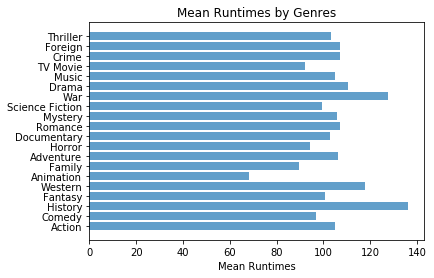

In [89]:
objects = list(genre_means_dict.keys())
performance = list(genre_means_dict.values())
y_pos = np.arange(len(objects))
plt.yticks(y_pos, objects)
plt.barh(y_pos, performance, align='center', alpha=0.7)
plt.xlabel('Mean Runtimes')
plt.ylabel('Genres')
plt.title('Mean Runtimes by Genres')

**From above discussion we can figure that histort genre has the highest mean runtimes , which is clear from the DataFrame plot and visualisation**

<br>

### Question 4: What kinds of properties are associated with movies that have high revenues?

To achieve this we will try solving as -<br> 1) sort the revenue series ,<br> 2) select the first 10% of the movies with high revenues ,<br>
3) then try to find any pattern which common in between these  10% selected movies , like what are there genre , running time.

**Assumptions **- We will assume that only first 10% of the movies can be said to be high revenue ones.

Sort the revenue series , then select 10% of the first movies.

In [99]:
# Assuming first 10% movies can be said to be high revenue.

Also get the indexes of the these 10% movies.

In [100]:
hi_rev_movies_sr=tmdb_movies_df['revenue'].sort_values(ascending=False,inplace=False)[:1000]
hi_rev_movies_sr_index=hi_rev_movies_sr.index.values

The using the indexs of these 10% movies get there corresponding genre.

In [101]:
hi_rev_genre=tmdb_movies_df.loc[hi_rev_movies_sr_index,'genres']

Now create a dictionary using the keys of the of the genre set. We will use this dictionary to get the count of movies by there genre.

In [102]:
hi_rev_genre_dict = dict.fromkeys(genre_set, 0)

Using the below function we will count the genres and update in the correspoding dictionary.

Create a plot of the Dataframe

In [103]:
def spliter_n_counter(genre_row):
    x=str(genre_row).split('|')
    for v in x:
        hi_rev_genre_dict[v]+=1
hi_rev_genre.apply(spliter_n_counter)
pd.Series(hi_rev_genre_dict, name='DateValue')

Action             396
Adventure          346
Animation          118
Comedy             357
Crime              138
Documentary          0
Drama              328
Family             202
Fantasy            181
Foreign              0
History             27
Horror              62
Music               32
Mystery             82
Romance            152
Science Fiction    184
TV Movie             0
Thriller           291
War                 38
Western             14
Name: DateValue, dtype: int64

Create a Visualization of the Dataframe

Text(0.5,1,'High revenue movies by Genres')

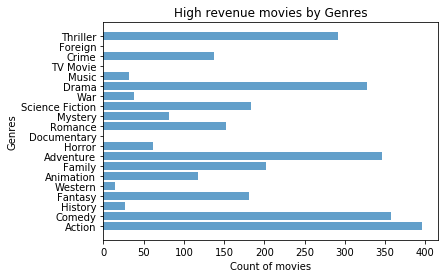

In [104]:
#plt.bar(hi_rev_genre_dict.keys(), hi_rev_genre_dict.values(), width=0.5, color='b')
objects = list(hi_rev_genre_dict.keys())
performance = list(hi_rev_genre_dict.values())
y_pos = np.arange(len(objects))
plt.yticks(y_pos, objects)
plt.barh(y_pos, performance, align='center', alpha=0.7)
plt.xlabel('Count of movies')
plt.ylabel('Genres')
plt.title('High revenue movies by Genres')

**Property 1)** From above discussion we can figure that Count of **Action** movies with higher revenues is priorly higher than others , 2nd highest being Comedy which is clear from the DataFrame plot and visualisation

> Next we try Analizing running times of these high revenue movies. 

In [34]:
hi_rev_run=tmdb_movies_df.loc[hi_rev_movies_sr_index,'runtime']
ddp=hi_rev_run > hi_rev_run.mean()
len(hi_rev_run[ddp])

442

**Property 2)** From above discussion we can figure that less than 50% of these movies have running times less than overall mean.

<br>

Atlast we try Analizing the correlation between budget and revenues of these high revenue movies.

In [35]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    standard_x=(x-x.mean())/x.std(ddof=0)
    standard_y=(y-y.mean())/y.std(ddof=0)
    return (standard_x*standard_y).mean()

In [36]:
correlation(tmdb_movies_df['budget'], tmdb_movies_df['revenue'])

0.7349006818217312

**Property 3)** We can figure that there is quite a correlation between all the movies present in the dataset.
<br>But correlation between the high revenue movies 10% ones is less than that of all the movies as depicted below, which is obvious since the sample size decreases rigoursly.

In [37]:
hi_rev_budget=tmdb_movies_df.loc[hi_rev_movies_sr_index,'budget']
hi_rev_revenue=tmdb_movies_df.loc[hi_rev_movies_sr_index,'revenue']
correlation(hi_rev_budget, hi_rev_revenue) < correlation(tmdb_movies_df['budget'], tmdb_movies_df['revenue'])

True

<br>

In [ ]:
You need to state 

<a id='conclusions'></a>
## Conclusions

**Limitation of the dataset**<br>

* Dataset contains errors in information provided for **cast and director** column, some errorenous characters are present in these columns, leading to inaccurate information.

* Since we have collected **popularity** information in the dataset it means that we are using data from surveys.Then we must keep in mind that people don’t always provide accurate information as they may also be biased.

* Since data may be biased we may not get accurate analysis.

* Sample size of **10,000** may not be enough to represent a whole population and answer questions like , Which genre is most liked by the population as a whole.

* There are certain outliners (like budget and revenues) also in the dataset provided which may lead to inaccurate results when question are asked in relation to the whole population.

**Future Work ** -<br>
* If data related to human behavioural changes is also provided , we may also wish to  acertain some relationship on how a particular genre effects the human behaviour.


**Conclusions analysed from the Dataset **

> (1) From above discussion we can figure that 'Wild Hog' made highest gross profit % in the year 2007 , which is clear from the DataFrame plot and visualisation.

> (2) From above discussion we can figure that most popular genres are - Action , Adventure ,Science Fiction ,Thriller in year 2015 , which is clear from the DataFrame plot and visualisation

> (3) From above discussion we can figure that histort genre has the highest mean runtimes , which is clear from the DataFrame plot and visualisation

>  (4). - (i) From above discussion we can figure that Count of Action movies with higher revenues is priorly higher than others , 2nd highest being Comedy which is clear from the DataFrame plot and visualisation

> (4). - (ii) From above discussion we can figure that less than 50% of these movies have running times less than overall mean.

> (4). - (iii) We can figure that there is quite a correlation between all the movies present in the dataset. 
But correlation between the high revenue movies 10% ones is less than that of all the movies as depicted below, which is obvious since the sample size decreases rigoursly.

>> **Thank You !!!**
